In [1]:
#Importing all the necessary Libraries
import requests
import json
import os
import csv
import re

In [2]:
key=os.getenv('nyt_key')

In [3]:
#Importing beautifulSoap, Counter and Tokenizer
import pylab as plt
from bs4 import BeautifulSoup
from collections import Counter
from nltk.tokenize import word_tokenize

In [4]:
#Loading and storing of data

relativePath = os.getcwd()
apiKey = 'e31bc7e0e6ae4eaa88ce8784982924db'



In [5]:
#Fetching the data with year 2014 and month 11
year = 2013
month = 10

url = "https://api.nytimes.com/svc/archive/v1/"+str(year)+"/"+str(month)+".json?api-key="+apiKey
response = requests.get(url)
content  = response.json()

#Loading of data is being done here
with open(relativePath+"/"+'midterm/data/jsonData_NY'+"/"+str(month)+"-"+str(year)+'.json', 'w') as file:
    json.dump(content, file)

# Analysis 1 : Often used category liners in a timeline
# Analysis 2 : Popular category in a particular timeframe

In [6]:
path = relativePath+"/"+'midterm/data/jsonData_NY'

#Analysing the data category wise
def getArticles(file, category):
    config = json.loads(open(file).read())
    for x in range(len(config['response']['docs'])):
        section = config['response']['docs'][x]['subsection_name']
        category.append(section)
    

In [10]:
#Appending all the articles to the list
category = []
for directory, subDirectory, filename in os.walk(path):
    for file in filename:
        getArticles(os.path.join(directory, file), category)
print(len(category))
count={} 

31390


In [11]:
#Storing the count of each word in the dictionary by looping across the dataset.
for word in category:
    count = fcount.get(word,0)
    fcount[word] = count + 1
sortedDict = sorted(fcount.items(), key=lambda x: (-x[1], x[0])) 
print(sortedDict[:10])
i = 0
oredering = []

#Giving rank to each word based on the count
for rank in range(len(sortedDict)):
    obj1 = sortedDict[rank]
    obj1 = obj1 + (i,)
    oredering.append(obj1) 
    i = i+1
fileName = relativePath+"/"+'midterm/NYTS_NY.csv'

[(None, 34426), ('Asia Pacific', 2206), ('Dealbook', 2172), ('Politics', 1510), ('Europe', 1440), ('Middle East', 1388), ('Pro Football', 1240), ('Music', 1212), ('Media', 1090), ('Baseball', 1084)]


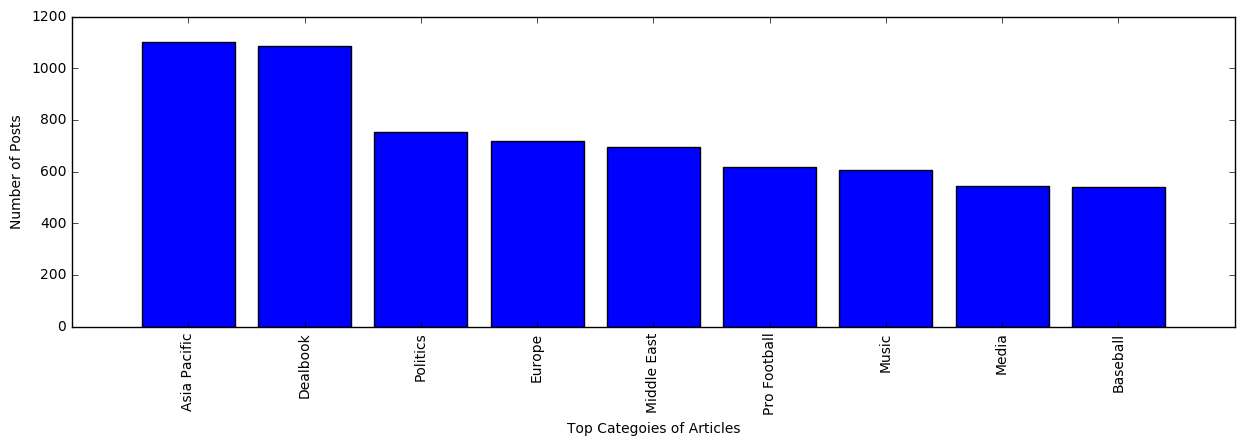

In [9]:
#Loading of the data is being done here
with open(fileName, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Category", "Count"])
    a.writerows(oredering[:10])
label = []
y = []
z = []
with open(fileName,'r') as csvfile:
    next(csvfile)
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        label.append(row[0])
        y.append(int(row[1]))
        z.append(int(row[2]))
        
pieFig = relativePath+"/"+'midterm/Analysis_NY.png'
plt.figure(figsize=(10,5))
plt.bar(z, y, align='center')
plt.xticks(z, label, rotation=90)
plt.xlabel("Top Categoies of Articles")
plt.ylabel("Number of Posts")
plt.savefig(pieFig, bbox_inches='tight')
plt.show()


# Analysis 3: Music Analysis

In [32]:
def getValue(file, keyWords):
    config = json.loads(open(file).read())
    for x in range(len(config['response']['docs'])):
        headline = config['response']['docs'][x]['headline']['main']
        if 'Music' in headline: 
#Collecting the data containing Music
            for y in range(len(config['response']['docs'][x]['keywords'])):
                val = config['response']['docs'][x]['keywords'][y]['value']
                keyWords.append(val)
#Analyzing the liners dealing with Music Industry
keyWords = [] 
for directory, subDirectory, filename in os.walk(path):
    for file in filename:
        getValue(os.path.join(directory, file), keyWords)

In [33]:
#Writing the words to a text file
with open(relativePath+"/"+'midterm/keyWords.txt', "w") as f:
    for unique in keyWords:
        f.write(unique)
        f.write("\n")

In [34]:
with open(relativePath+"/"+'midterm/keyWords.txt', "r") as f:
    data = f.readlines()
uniqueWords = {} 
for word in data:
    
#finding out the unique keywords and then adding 
    word = word.replace("\n", "")
    if word in uniqueWords:
        uniqueWords[word] += 1
    else:
        uniqueWords[word] = 1
        sortedDict = sorted(uniqueWords.items(), key=lambda x: (-x[1], x[0]))
    newList = sortedDict[1:11]
print(newList)

[('Classical Music', 45), ('Theater', 23), ('Opera', 17), ('Spotify', 9), ('Television', 8), ('Audio Recordings and Downloads', 7), ('Books and Literature', 7), ('Royalties', 7), ('Minnesota Orchestra', 6), ('Movies', 6)]


In [35]:
#Assinging the rank now to the words:
i = 1
newListOfKeywords = []
for rank in range(len(newList)):
    obj = newList[rank]
    obj = obj + (i,)
    newListOfKeywords.append(obj)
    i = i+1

In [36]:
#CSV Files
fileNameNew = relativePath+"/"+'midterm/Music.csv'
with open(fileNameNew, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["KeyWords", "Count", "Rank"])
    a.writerows(newKeyWordList)

In [37]:
key = []
count = []
rank = []
with open(fileNameNew,'r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        key.append(str((row[0])))
        count.append(int(row[1]))
        rank.append(int(row[2]))

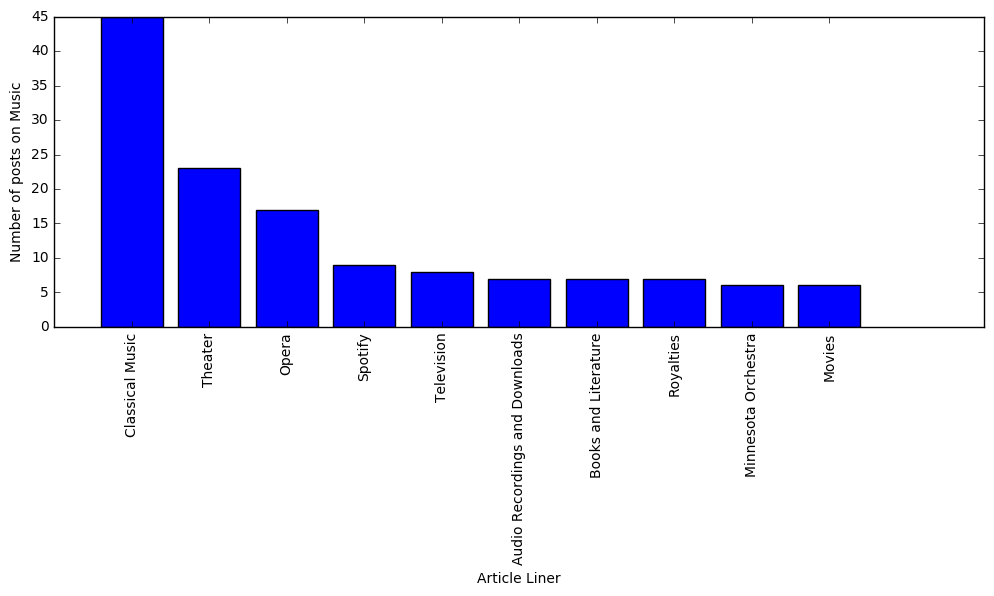

In [31]:
#Sub Categories graph:
exportFig = relativePath+"/"+'midterm/Music.png'
plt.figure(figsize=(12,4))
plt.bar(rank, count, align='center', color='blue')
plt.xticks(rank, key, rotation=90)
plt.xlabel("Article Liner")
plt.ylabel("Number of posts on Music")
plt.savefig(exportFig, bbox_inches='tight')
plt.show()